<a href="https://colab.research.google.com/github/mahi97/MahiColabs/blob/master/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)
tf.InteractiveSession()

1.13.1


In [3]:
a = tf.constant(5)
b = tf.constant(10)
c = a + b
print (c , c.eval())

Tensor("add:0", shape=(), dtype=int32) 15


In [4]:
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)
print(x)

Tensor("LinSpace:0", shape=(32,), dtype=float32)


In [5]:
x.eval()

array([-3.        , -2.8064516 , -2.612903  , -2.419355  , -2.2258065 ,
       -2.032258  , -1.8387097 , -1.6451614 , -1.451613  , -1.2580645 ,
       -1.0645162 , -0.8709678 , -0.6774194 , -0.48387104, -0.29032266,
       -0.09677428,  0.0967741 ,  0.29032248,  0.48387086,  0.67741925,
        0.8709676 ,  1.0645161 ,  1.2580644 ,  1.4516127 ,  1.6451612 ,
        1.8387096 ,  2.032258  ,  2.2258062 ,  2.4193547 ,  2.612903  ,
        2.8064513 ,  2.9999998 ], dtype=float32)

In [0]:
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) / 
                       (2.0 * tf.pow(sigma, 2.0)))) * 
    (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))


In [0]:
# %% By default, new operations are added to the default Graph

assert z.graph is tf.get_default_graph()

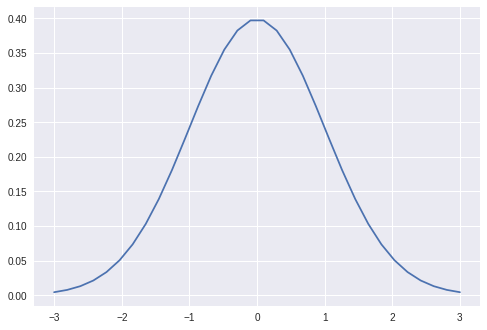

In [8]:
plt.plot(x.eval(), z.eval())
plt.show()

In [9]:
print(z.get_shape())
print(z.get_shape().as_list())
print(tf.shape(z).eval())
print(tf.stack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

(32,)
[32]
[32]
[[32]
 [32]
 [ 3]
 [ 4]]


In [0]:
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(-z, [1, n_values]))

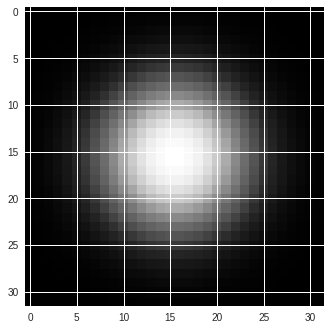

In [11]:
plt.imshow(z_2d.eval())
plt.show()

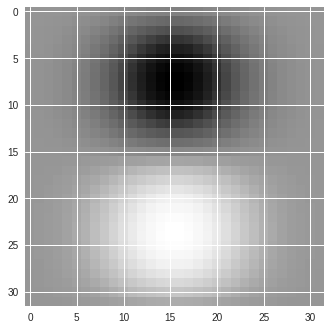

In [12]:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.matmul(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())
plt.show()

In [13]:
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])

['Const', 'Const_1', 'add', 'LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace', 'sub/y', 'sub', 'Pow/y', 'Pow', 'Pow_1/x', 'Pow_1/y', 'Pow_1', 'mul/x', 'mul', 'truediv', 'Neg', 'Exp', 'Sqrt/x', 'Sqrt', 'mul_1/x', 'mul_1', 'truediv_1/x', 'truediv_1', 'mul_2', 'Shape', 'Shape_1', 'Shape_2', 'stack/2_1', 'stack/3_1', 'stack', 'Reshape/shape', 'Reshape', 'Neg_1', 'Reshape_1/shape', 'Reshape_1', 'MatMul', 'LinSpace_1/start', 'LinSpace_1/stop', 'LinSpace_1/num', 'LinSpace_1', 'Sin', 'Reshape_2/shape', 'Reshape_2', 'ones_like/Shape', 'ones_like/Const', 'ones_like', 'Reshape_3/shape', 'Reshape_3', 'MatMul_1', 'MatMul_2']


In [0]:
def gabor(n_values = 32, sigma = 1.0, mean = 0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
              (2.0 * tf.pow(sigma, 2.0)))) *
         (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.matmul(tf.matmul(x, y), gauss_kernel)
    return gabor_kernel

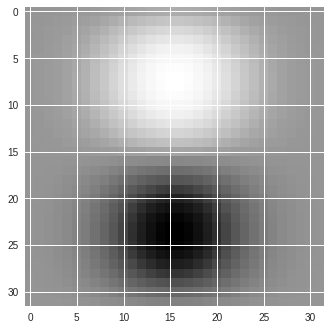

In [15]:
plt.imshow(gabor().eval())
plt.show()

In [0]:
def convolve(img, W):
    if len(W.get_shape()) == 2:
        dims = W.get_shape().as_list() + [1, 1]
        W = tf.reshape(W, dims)
    if len(img.get_shape()) == 2:
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        W = tf.concat([W, W, W], axis = 2)
    
    convolved = tf.nn.conv2d(img, W, strides=[1,1,1,1,], padding='SAME')
    
    return convolved

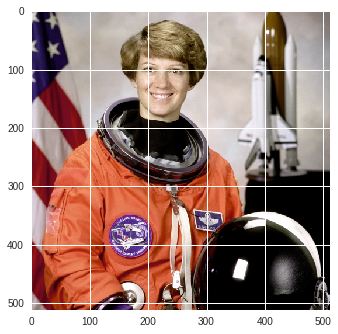

(512, 512, 3)


In [17]:
from skimage import data
img = data.astronaut()
plt.imshow(img)
plt.show()
print(img.shape)

In [0]:
x = tf.placeholder(tf.float32, shape=img.shape)
out = convolve(x, gabor())

In [0]:
result = tf.squeeze(out).eval(feed_dict={x:img})

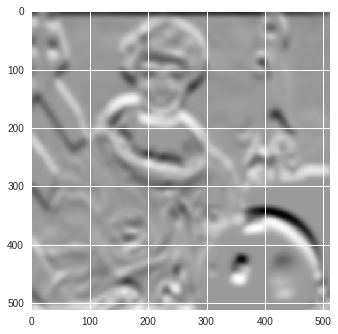

In [20]:
plt.imshow(result)
plt.show()